In [51]:
# Import necessary modules
import numpy as np
import pandas as pd
import re

# read the csv file into Dataframe: df, and check data is read ok
df = pd.read_csv('data_assignment.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(3)  


The Dataset consists of:  149999  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


In [2]:
# A3: PART 2 OF GROUP ASSESSMENT - Susana's contribution
#=======================================================
# Section 1. Analyse by comparison: 7 points
# Choose 2 locations: Adelaide & Sydney
# 1.1 which city has the most jobs? How many jobs for each job type in each city?
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

# read and preprocess data set
df = pd.read_csv('data_assignment.csv')

# create new datasets for Adelaide and Sydney
City1 = df[df['Location'] == "Adelaide" ] 
City2 = df[df['Location'] == "Sydney" ] 

# total jobs for each city
City1['JobType'].value_counts()
City2['JobType'].value_counts()
print('There are',len(City1), 'total jobs for Adelaide')
print('There are',len(City2), 'total jobs for Sydney')

x = len(City1) #Adelaide
y = len(City2) #Sydney

#calculate which city out of the 2 has most jobs advertised
if x > y:
    print('Adelaide has the most jobs compared to Sydney')
else:
    print('Sydney has the most jobs compared to Adelaide')

# Group and aggregate by job type
City1 = City1.groupby('JobType').count()
print('\nNumbers by job types in Adelaide')
print(City1)

City2 = City2.groupby('JobType').count()
print('\nNumbers by job type in Sydney')
print(City2)


There are 4998 total jobs for Adelaide
There are 46357 total jobs for Sydney
Sydney has the most jobs compared to Adelaide

Numbers by job types in Adelaide
                   Id  Title  Company  Date  Location  Area  Classification  \
JobType                                                                       
Casual/Vacation   619    619      578   619       619     0             619   
Contract/Temp     822    822      809   822       822     0             822   
Full Time        3066   3066     2882  3066      3066     0            3066   
Part Time         393    393      376   393       393     0             393   

                 SubClassification  Requirement  FullDescription  \
JobType                                                            
Casual/Vacation                619          619              619   
Contract/Temp                  822          822              822   
Full Time                     3066         3066             3065   
Part Time                   

In [3]:
# 1.2 In each city, which are top 5 job sectors? How many jobs are in each sector? 
#creating new data frame for each city
df_City1 = df[df['Location'] == "Adelaide" ]['Classification'].value_counts()
df_City2 = df[df['Location'] == "Sydney" ]['Classification'].value_counts()

print('Top 5 sectors in Adelaide with total jobs:')
print(df_City1[0:5])
print('\nTop 5 sectors in Sydney with total jobs:')
print(df_City2[0:5])

Top 5 sectors in Adelaide with total jobs:
Trades & Services                         621
Healthcare & Medical                      554
Manufacturing, Transport & Logistics      420
Hospitality & Tourism                     385
Information & Communication Technology    378
Name: Classification, dtype: int64

Top 5 sectors in Sydney with total jobs:
Information & Communication Technology    6999
Trades & Services                         3181
Accounting                                3105
Hospitality & Tourism                     3081
Manufacturing, Transport & Logistics      2536
Name: Classification, dtype: int64


/Users/misszani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


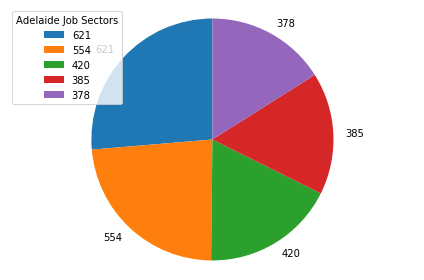

/Users/misszani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


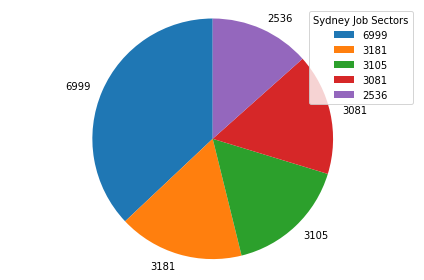

In [4]:
# 1.3 Visualise the top 5 job sectors in pie chart for each city.* (1.5 point)
# !! Still need to set sector labels correctly on pies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

top5_City1 = df_City1[0:5]
top5_City2 = df_City2[0:5]

City1_labels = top5_City1 #['Classification']
City2_labels = top5_City2 #['Classification']

#Set title, legend and plot pie chart for City1
plt.title=('Top 5 Job Sectors for Adelaide')

# Pie chart for City1
City1_sizes = top5_City1[0:5]
 
#Setting Figure 1 for City1    
fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(City1_sizes, labels=City1_labels, startangle=90)
# Set legend
plt.legend(patches, labels=City1_labels, title='Adelaide Job Sectors', loc= 'best')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# Pie chart for City2
City2_sizes = top5_City2[0:5]
 
#Setting Figure 1 for City1    
fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(City2_sizes, labels=City2_labels, startangle=90)
# Set legend
plt.legend(patches, labels=City2_labels, title='Sydney Job Sectors', loc= 'best')

# Equal aspect ratio ensures that pie is drawn as a circle
#plt.title('Top 5 Sectors for Sydney')#,size=16,loc='center')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [8]:
# 1.4 List the job salary range with the total job numbers for each city. Which city has the most
# highest paying jobs?

# read and set salary ranges from numbers to strings
df_City1 = df[df['Location'] == "Adelaide" ]
df_City2 = df[df['Location'] == "Sydney" ]

df_City1['SalaryRange'] = '$'+ df_City1['LowestSalary'].astype(str) + ' - $' + df_City1['HighestSalary'].astype(str)
df_City1.SalaryRange.value_counts()

df_City2['SalaryRange'] = '$'+ df_City2['LowestSalary'].astype(str) + ' - $' + df_City2['HighestSalary'].astype(str)
df_City2.SalaryRange.value_counts()


/Users/misszani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/misszani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


$0 - $30       8427
$150 - $200    4718
$40 - $50      4406
$100 - $120    4330
$120 - $150    4228
$60 - $70      4152
$70 - $80      3850
$50 - $60      3751
$80 - $100     3702
$30 - $40      3035
$200 - $250    1758
Name: SalaryRange, dtype: int64

In [16]:
# 1.5 List top 5 companies in each city? ** Which sectors do they belong to?
df_City1 = df[df['Location'] == "Adelaide" ]['Company'].value_counts()
df_City2 = df[df['Location'] == "Sydney" ]['Company'].value_counts()

print('Top 5 Companies in Adelaide: ')
print(df_City1[0:5])
print('\nTop 5 Companies in Sydney:')
print(df_City2[0:5])


Top 5 Companies in Adelaide: 
Jora Local               109
S.A. Health              106
Hays Talent Solutions     46
Excel Recruitment         41
Randstad - Industrial     36
Name: Company, dtype: int64

Top 5 Companies in Sydney:
Jora Local                       1426
Robert Walters                    448
Design & Build                    407
Bluefin Resources Pty Limited     254
Paxus                             251
Name: Company, dtype: int64


In [ ]:
# 1.6 Between 2 cities, which do you think it is better for employees. Explain your choice.
# =========================================================================================
# Looking at the comparison between the 2 cities of Adelaide and Sydney, Sydney would be better for employees as
# there are salaries are higher and there are more job opportunities and postings available.


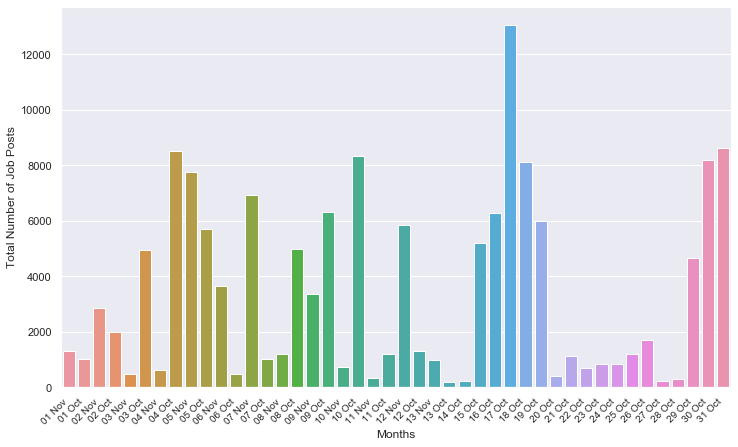

In [57]:
# Analyse by time. (7 points)
# In this part, we will analyse the jobs based on the posting date.
# 2.1 Visualise the number of job posts by month. (1 point)
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read and preprocess data set
df = pd.read_csv('data_assignment.csv')

#cleaning date data to just dates
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])

# count totals for each month - **NEED TO FIX, my graph is not totalling by month
df_monthly_counts = df[df["Date"].isna()==False]
df_monthly_counts["Month"] =[x.strftime("%d %b") for x in df_monthly_counts["Date"]]

df_monthly_counts = df_monthly_counts.groupby('Month').count()
df_monthly_counts['Months'] = df_monthly_counts.index
df_monthly_counts['Count'] = df_monthly_counts["Id"]

# Set figure
sns.set()
plt.figure(figsize=(12,7))
barChart = sns.barplot(x='Months', y='Count', data=df_monthly_counts, dodge=False)
barChart.set_xticklabels(
    barChart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

#plt.title('Number of Jobs Posts by Month', size=20)  !! can't get my title to work????
plt.ylabel('Total Number of Job Posts', size=12)
plt.xlabel('Months', size=12)
plt.show()


In [65]:
# 2.2 Visualise the number of job posts by day of week. (1 point)

# Find day of the week for a given date 
import datetime  
from datetime import date 
import calendar 

date = df["Date"]

def findDay(date): 
    year, month, day = (int(i) for i in date.split(' '))     
    job_post_date = datetime.date(year, month, day) 
    return job_post_date.strftime("%A") 
  
print(findDay(date)) 

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
# 2.3 Visualise the number of job posts by day of the month. (1 point)
